In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

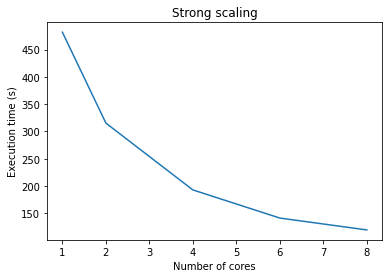

In [99]:
cpu=[]
author_com_count=[]
word_count=[]
word_score=[]
word_avg_score=[]
word_sum_tot=[]
total_time=[]
tot_speedup=[]
parallel=[]
serial=[]
with open("strong_data.txt", "r") as f:
    for line in f:
        l = line.split('\t')
        if l[0]=="cpu_count":
            continue
        else:
            cpu.append(float(l[0]))
            author_com_count.append(float(l[3]))
            word_count.append(float(l[4]))
            word_score.append(float(l[5]))
            word_avg_score.append(float(l[6]))
            word_sum_tot.append(float(l[7]))
            total_time.append(float(l[8]))
            if l[9]:
                tot_speedup.append(float(l[9]))
            else:
                tot_speedup.append(0)
            if l[10]:
                parallel.append(float(l[10]))
            else:
                parallel.append(0)
            if l[11]:
                serial.append(float(l[11]))
            else:
                serial.append(0)
                

plt.plot(cpu, total_time, label='total_time')
#plt.plot(cpu, author_com_count, label='author_com_count')#, cpu, word_count, label='word_count', 
         #cpu, word_score, label='word_score', cpu, word_avg_score, label='word_avg_score', cpu, word_score, label='word_score', 
        # cpu, word_sum_tot, label='word_sum_tot')
plt.xlabel('Number of cores')
plt.ylabel('Execution time (s)')
plt.title("Strong scaling")
plt.savefig("Strong_scaling", dpi=300)

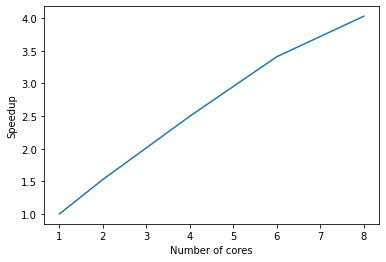

In [100]:
plt.plot(cpu, tot_speedup, label='total speedup')
plt.xlabel('Number of cores')
plt.ylabel('Speedup')
plt.savefig("Speedup", dpi=300)

Text(0, 0.5, 'Serial part')

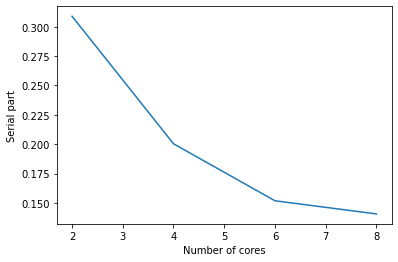

In [101]:
plt.plot(cpu[:-1], serial[:-1])
plt.xlabel('Number of cores')
plt.ylabel('Serial part')

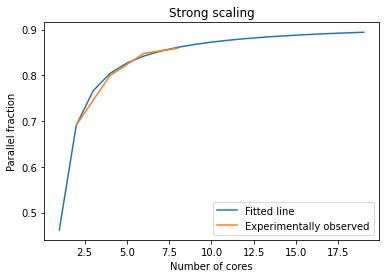

In [102]:
clf = linear_model.LinearRegression()
clf.fit([(1,1/x) for x in cpu[:-1]], parallel[:-1])

plt.plot(range(1,20), clf.predict([(1,1/x) for x in range(1,20)]))
plt.plot(cpu[:-1], parallel[:-1])
plt.legend(["Fitted line", "Experimentally observed"])
plt.title("Strong scaling")
plt.xlabel('Number of cores')
plt.ylabel('Parallel fraction')
plt.savefig("Fit", dpi=300)

In [65]:
clf.predict([[1,0]])

array([0.91833291])

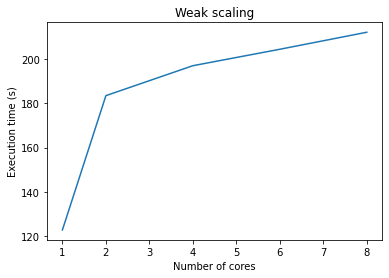

In [105]:
cpu=[]
data_size=[]
author_com_count=[]
word_count=[]
word_score=[]
word_avg_score=[]
word_sum_tot=[]
total_time=[]
scaled_speedup=[]
paralell=[]
serial=[]
efficiency=[]
with open("weak_data.txt", "r") as f:
    for line in f:
        l = line.split('\t')
        if l[0]=="cpu_count":
            continue
        else:
            cpu.append(float(l[0]))
            size=l[2].split()
            if size[1]=='MB':
                data_size.append(float(size[0]))
            elif size[1]=='GB':
                data_size.append(float(size[0])*1000)
            author_com_count.append(float(l[3]))
            word_count.append(float(l[4]))
            word_score.append(float(l[5]))
            word_avg_score.append(float(l[6]))
            word_sum_tot.append(float(l[7]))
            total_time.append(float(l[8]))
            if l[9]:
                scaled_speedup.append(float(l[9]))
            if l[10]:
                parallel.append(float(l[10]))
            if l[11]:
                serial.append(float(l[11]))
            if l[12]:
                efficiency.append(float(l[12]))

#plt.plot([c / d for c, d in zip(cpu, data_size)], total_time)
#plt.xlabel('Cores/data_size')
#plt.plot(data_size, total_time)
#plt.xlabel('Data size MB')
plt.plot(cpu, total_time)
plt.xlabel('Number of cores')
plt.ylabel('Execution time (s)')
plt.title("Weak scaling")
plt.savefig("Weak_scaling_time", dpi=300)

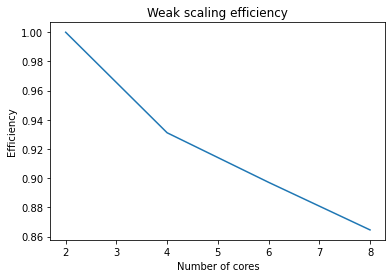

In [108]:
plt.plot(cpu[:-1], efficiency)
plt.xlabel('Number of cores')
plt.ylabel('Efficiency')
plt.title("Weak scaling efficiency")
plt.savefig("Weak_scaling_efficiency", dpi=300)

In [81]:
print("data_size:")
print(data_size)
print("Author commentary count:")
print(author_com_count)
print("Word count:")
print(word_count)
print("Word score:")
print(word_score)
print("Word avg score:")
print(word_avg_score)
print("Word sum total:")
print(word_sum_tot)
print("Total execution time:")
print(total_time)
print("scaled_speedup:")
print(scaled_speedup)

data_size:
[2550.0, 1910.0, 1220.0, 679.61, 330.57]
Author commentary count:
[23.82, 17.33, 20.84, 12.57, 11.63]
Word count:
[97.02, 101.64, 100.7, 95.33, 72.4]
Word score:
[74.01, 70.36, 62.25, 67.08, 30.92]
Word avg score:
[17.47, 15.27, 13.35, 8.58, 7.7]
Word sum total:
[188.5, 187.27, 176.3, 170.99, 111.02]
Total execution time:
[212.32, 204.6, 197.14, 183.56, 122.65]
scaled_speedup:
[4.6213263, 3.596774194, 2.488586791, 1.336347788]


In [83]:
print([d / c for c, d in zip(cpu, data_size)])

[318.75, 318.3333333333333, 305.0, 339.805, 330.57]
